In [46]:
import torch
from PIL import Image
import requests
from transformers import SamModel, SamProcessor

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SamModel.from_pretrained("facebook/sam-vit-huge").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-huge")

img_url = "https://huggingface.co/ybelkada/segment-anything/resolve/main/assets/car.png"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")
input_points = [[[450, 600]]]  # 2D location of a window in the image

inputs = processor(raw_image, input_points=input_points, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

masks = processor.image_processor.post_process_masks(
    outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu()
)
scores = outputs.iou_scores

In [47]:
scores = scores[0][0]

In [48]:
scores

tensor([0.9910, 0.9818, 0.9667], device='cuda:0')

In [49]:
index = torch.nonzero(scores > 0.99)[0][0]

In [69]:
from torchvision.transforms.functional import to_pil_image

idxs = torch.argsort(scores, descending=True)
for idx in idxs:
    print(idx)
    mask = masks[0, 0, idx]
    mask = mask.to(torch.uint8) * 255
    print(mask.shape)


tensor(0, device='cuda:0')


TypeError: list indices must be integers or slices, not tuple

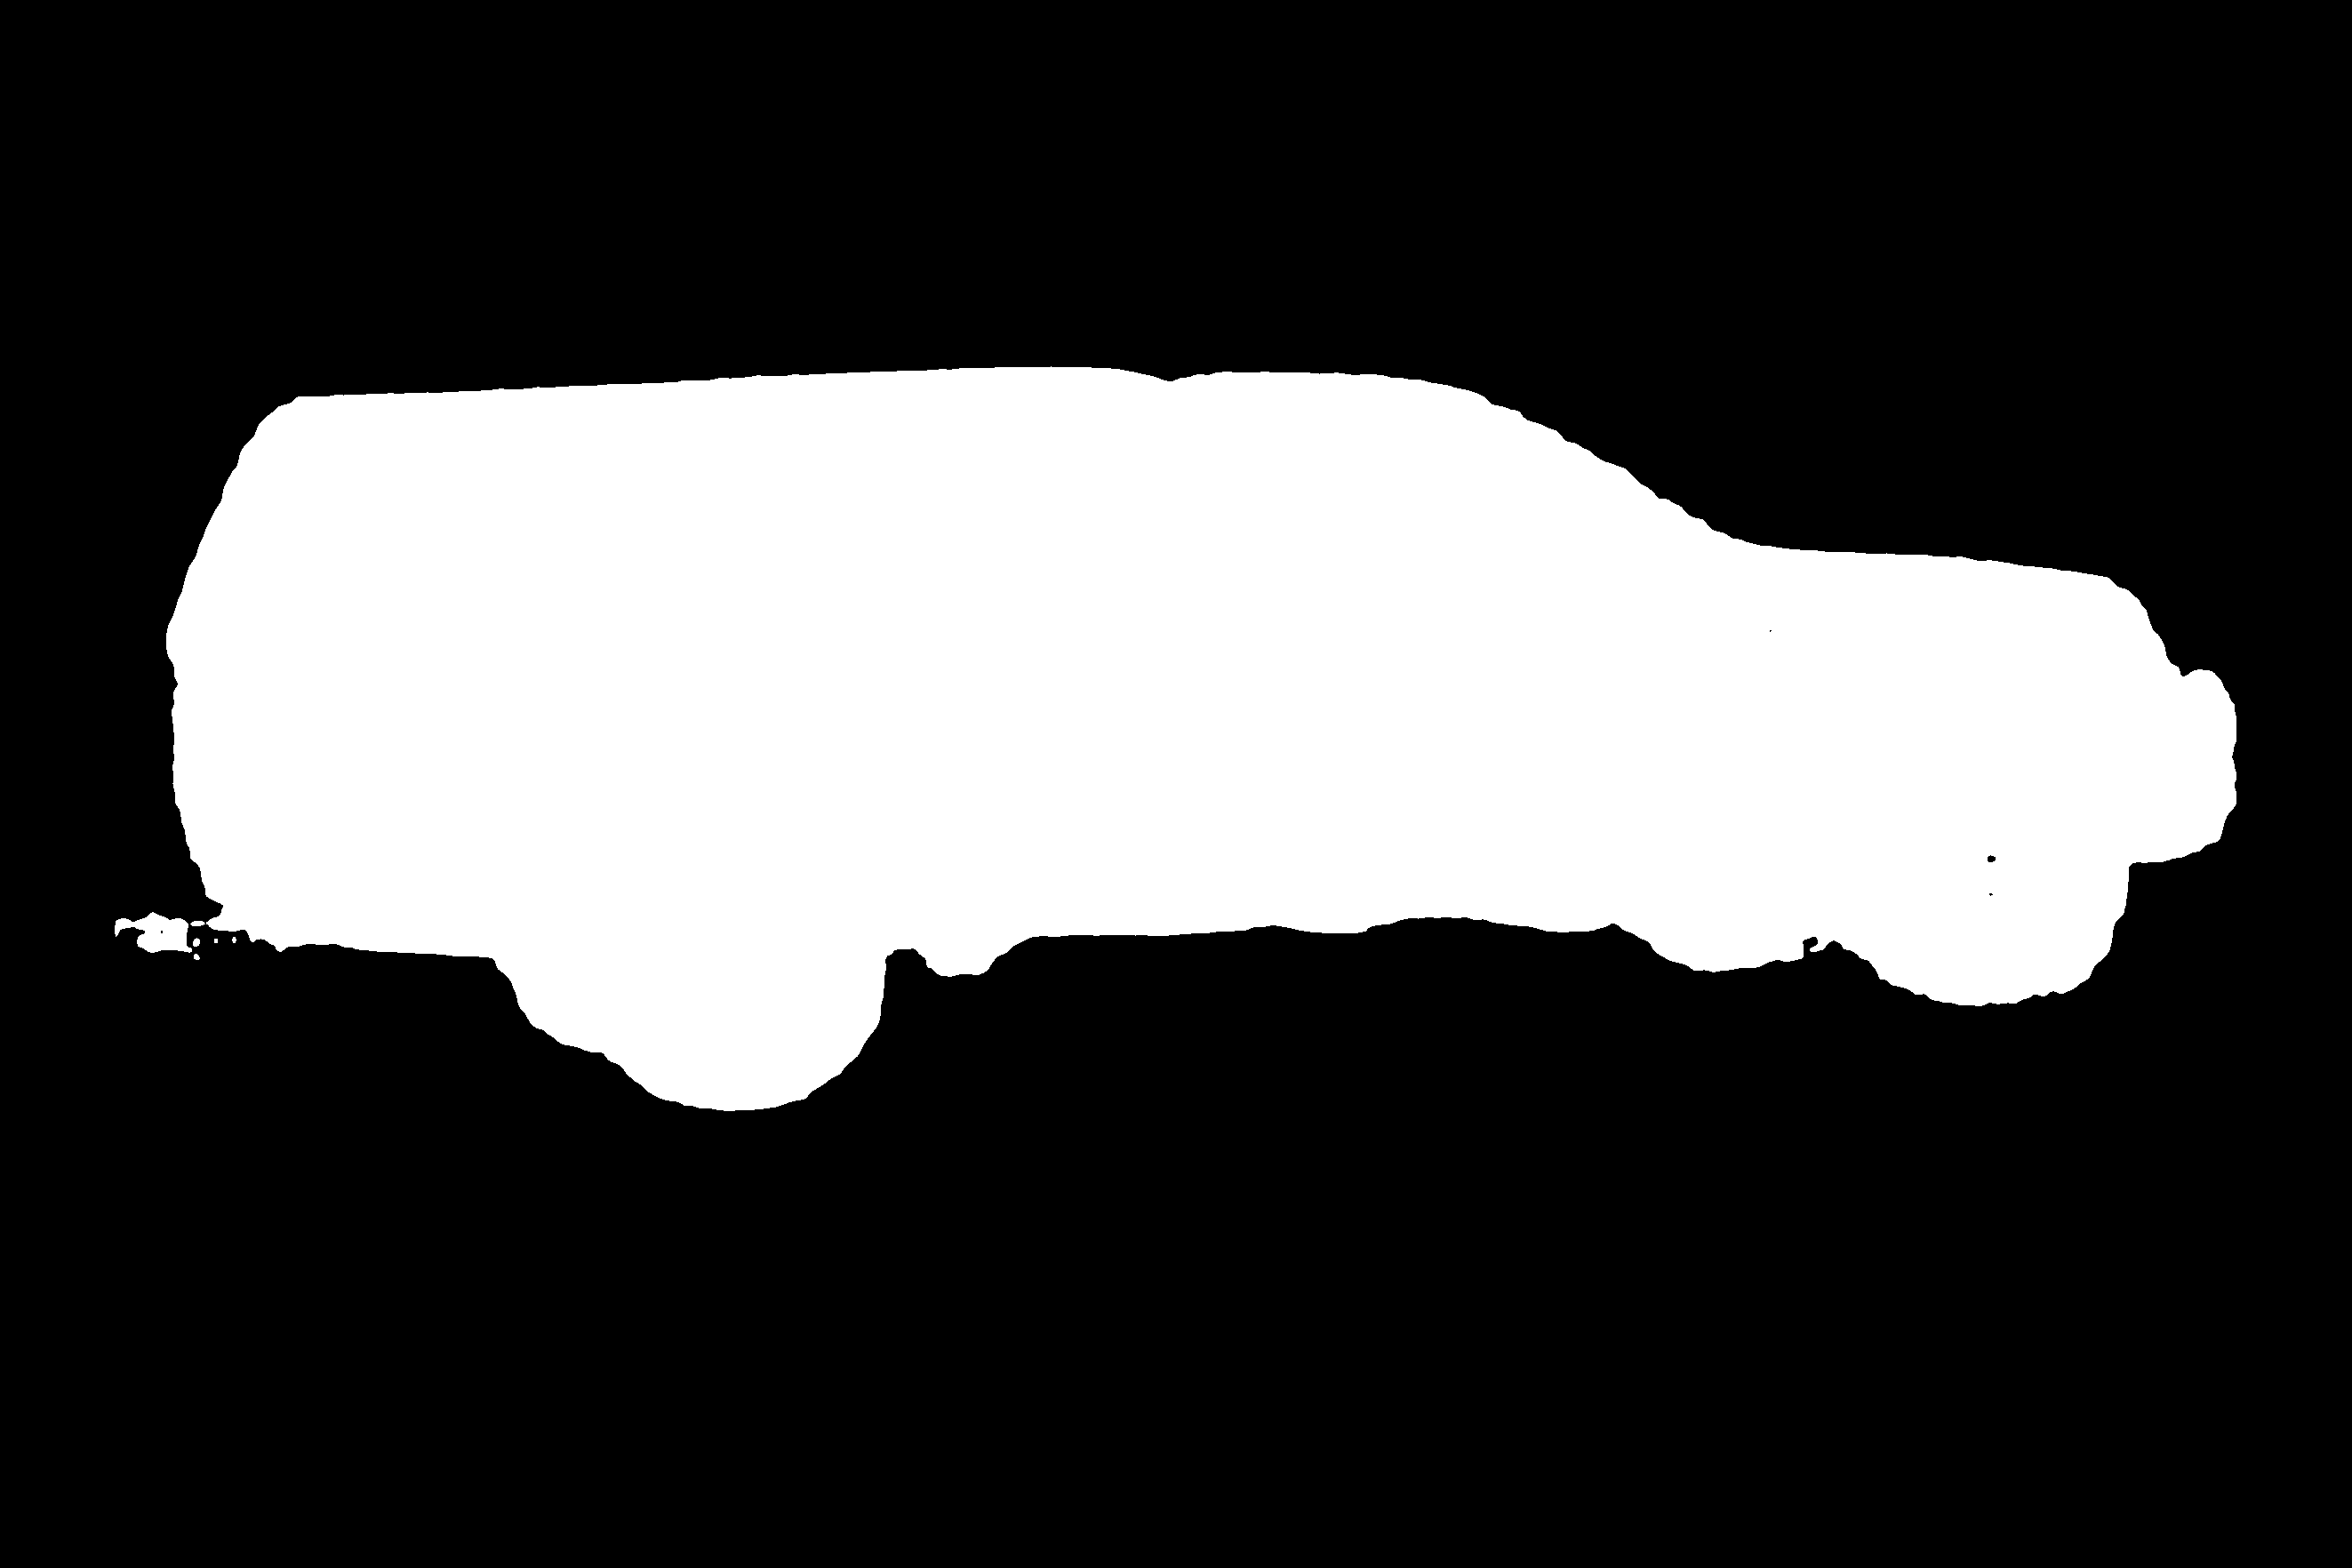

In [55]:
mask.convert('L')

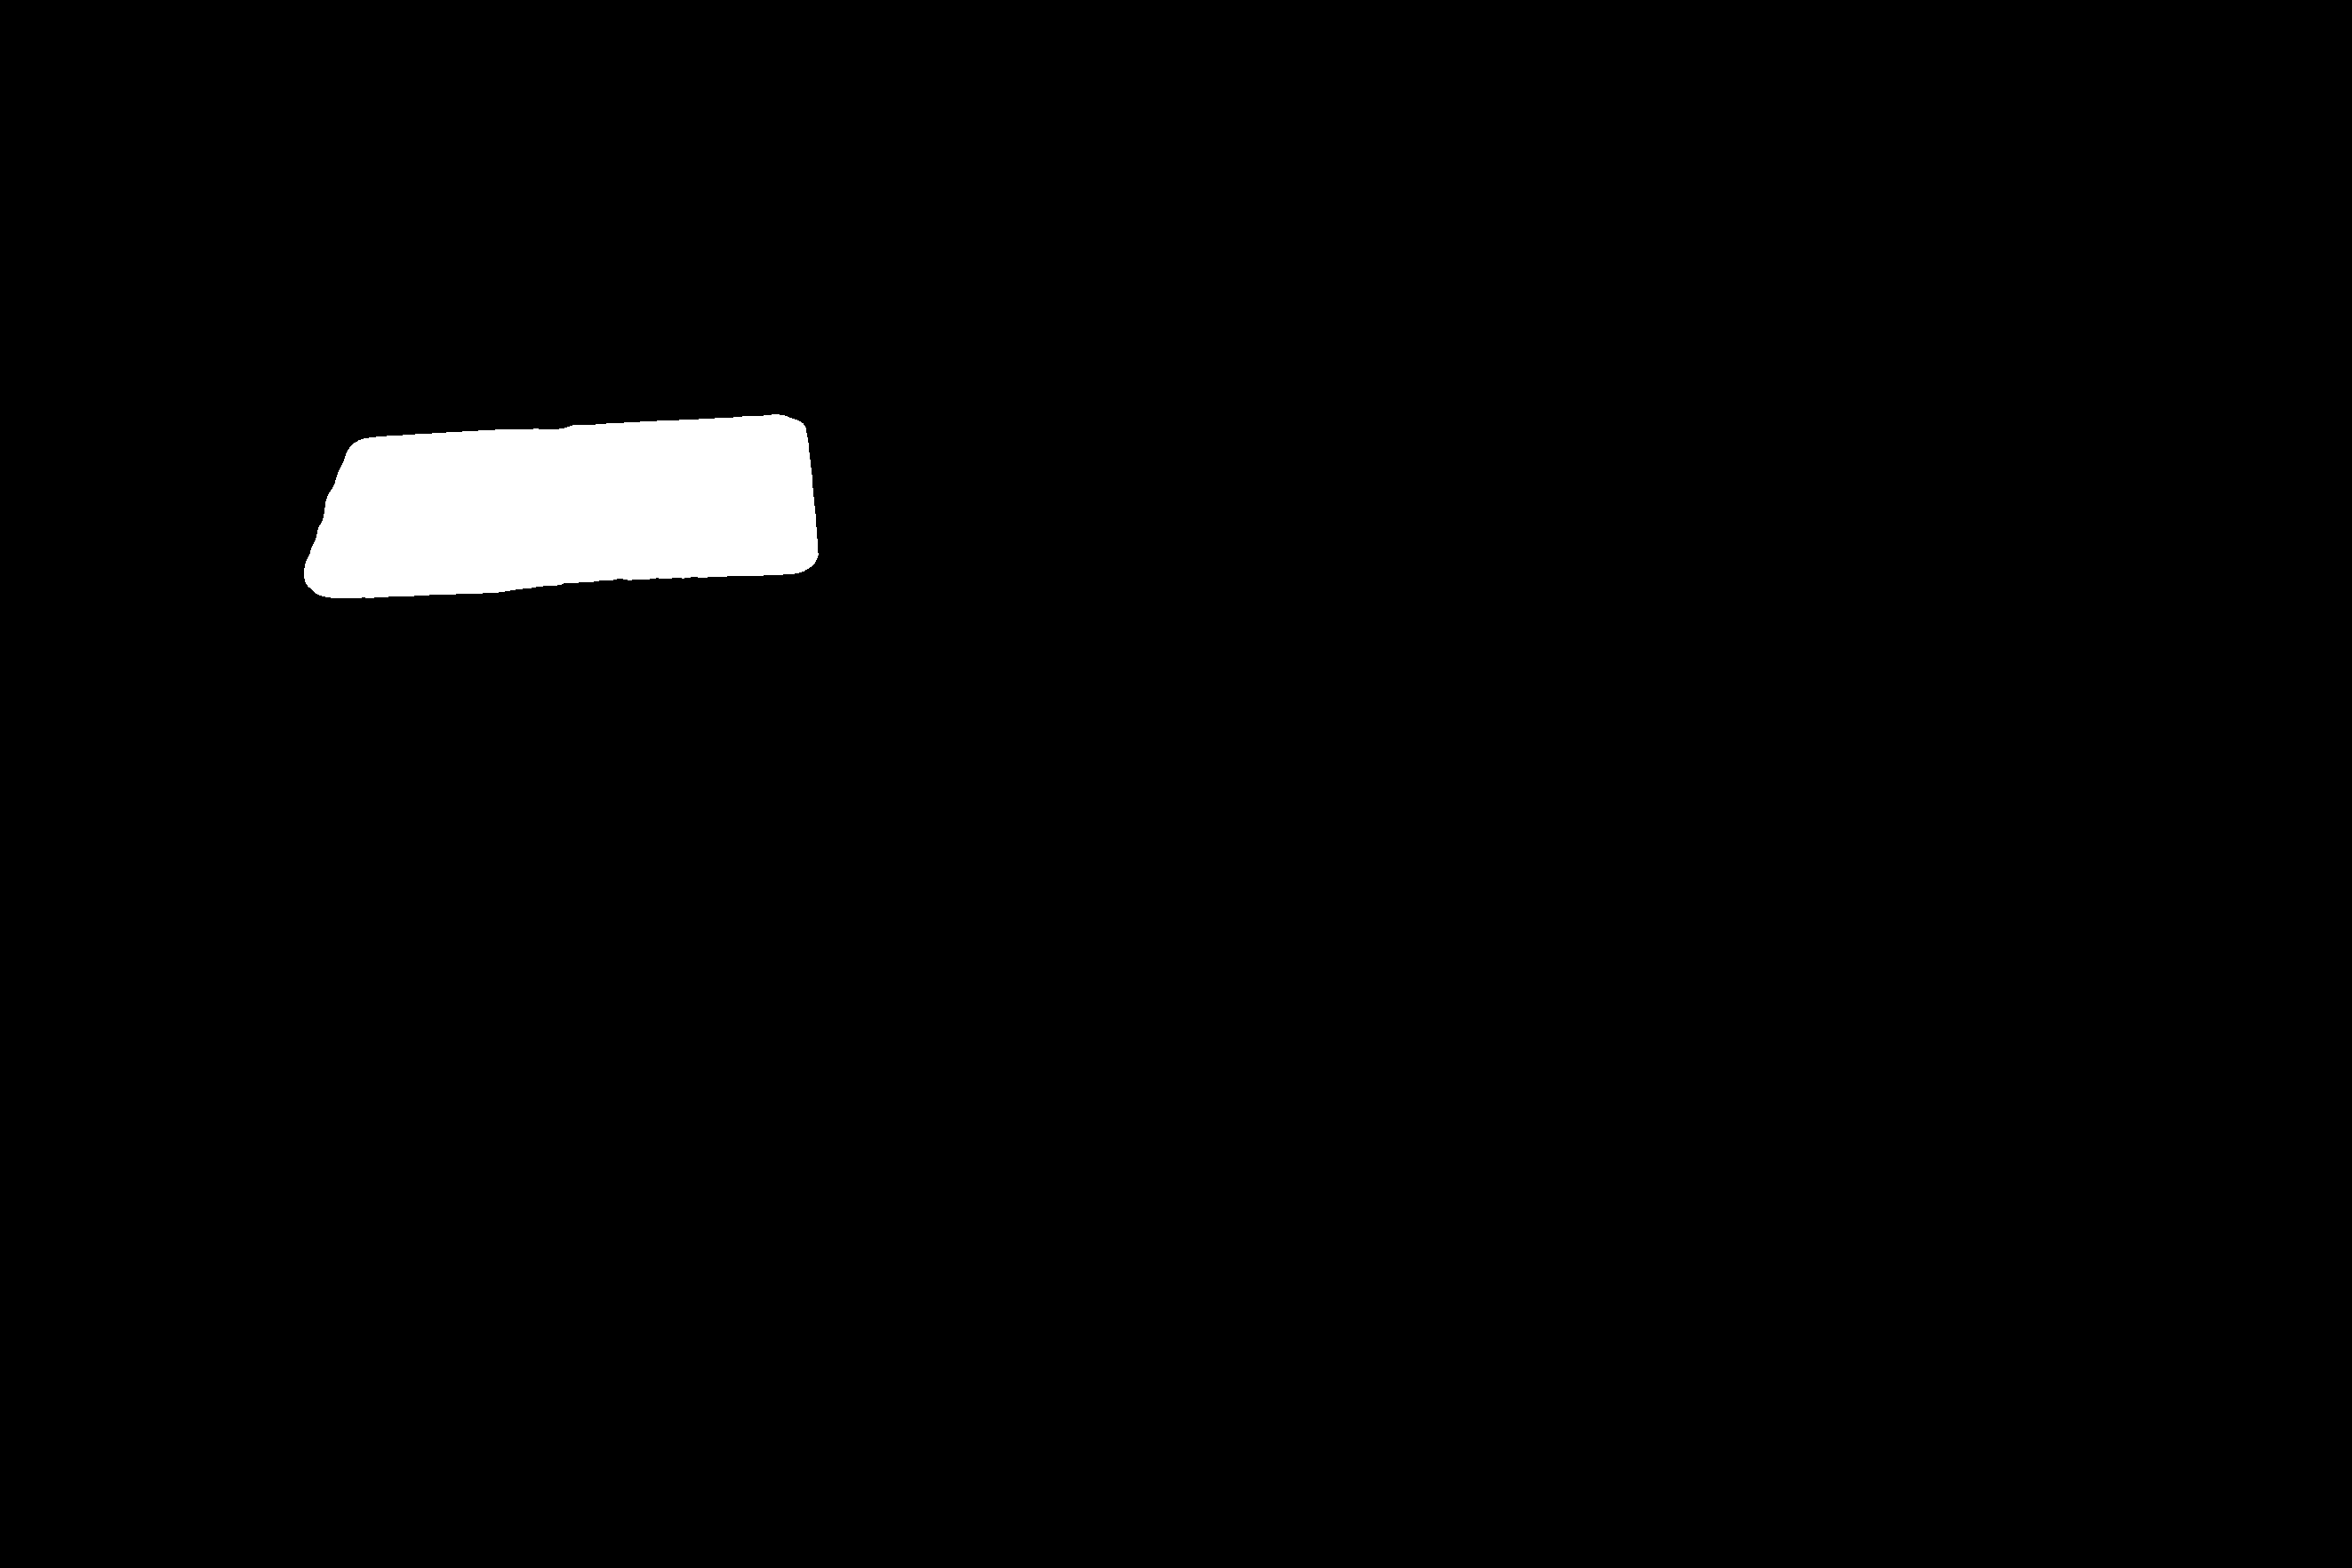

In [44]:
from torchvision.transforms.functional import to_pil_image

masks = masks[0][0]
mask = torch.bitwise_or(masks[0], masks[1])
mask = mask.to(torch.uint8) * 255

to_pil_image(mask)